In [1]:
# This file is in scripts/load.py
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import scipy
from scipy import stats
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from scipy import io
import random
import statistics
import matplotlib.pyplot as plt
from save_csv import *

## Question 3: Isocontours of Normal Distributions

### Part 1: Referenced from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html

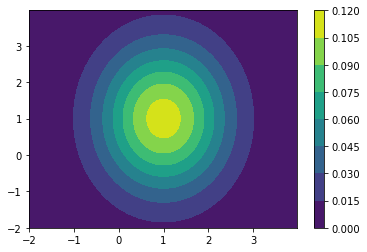

In [2]:
X, Y = np.mgrid[-2:4:.03, -2:4:.03]
pos = np.dstack([X, Y])
random_var = scipy.stats.multivariate_normal(mean=[1, 1], cov=[[1, 0],[0, 2]])
Z = random_var.pdf(pos)
plt.contourf(X, Y, Z)
plt.colorbar()

### Part 2:

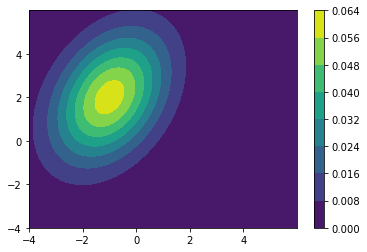

In [3]:
X, Y = np.mgrid[-4:6:.03, -4:6:.03]
pos = np.dstack([X, Y])
random_var = scipy.stats.multivariate_normal(mean=[-1, 2], cov=[[2, 1],[1, 4]])
Z = random_var.pdf(pos)
plt.contourf(X, Y, Z)
plt.colorbar()

### Part 3:

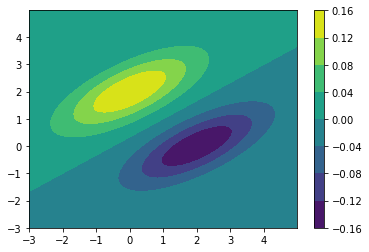

In [4]:
X, Y = np.mgrid[-3:5:.03, -3:5:.03]
pos = np.dstack([X, Y])
random_var1 = scipy.stats.multivariate_normal(mean=[0, 2], cov=[[2, 1],[1, 1]])
random_var2 = scipy.stats.multivariate_normal(mean=[2, 0], cov=[[2, 1],[1, 1]])
Z = random_var1.pdf(pos) - random_var2.pdf(pos)
plt.contourf(X, Y, Z)
plt.colorbar()

### Part 4:

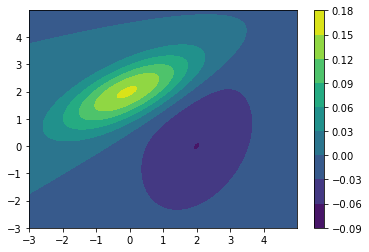

In [5]:
X, Y = np.mgrid[-3:5:.03, -3:5:.03]
pos = np.dstack([X, Y])
random_var1 = scipy.stats.multivariate_normal(mean=[0, 2], cov=[[2, 1],[1, 1]])
random_var2 = scipy.stats.multivariate_normal(mean=[2, 0], cov=[[2, 1],[1, 4]])
Z = random_var1.pdf(pos) - random_var2.pdf(pos)
plt.contourf(X, Y, Z)
plt.colorbar()

### Part 5:

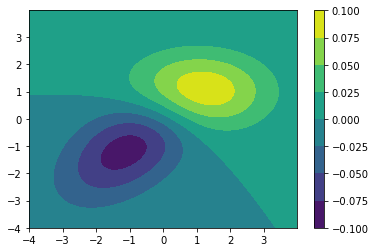

In [6]:
X, Y = np.mgrid[-4:4:.03, -4:4:.03]
pos = np.dstack([X, Y])
random_var1 = scipy.stats.multivariate_normal(mean=[1, 1], cov=[[2, 0],[0, 1]])
random_var2 = scipy.stats.multivariate_normal(mean=[-1, -1], cov=[[2, 1],[1, 2]])
Z = random_var1.pdf(pos) - random_var2.pdf(pos)
plt.contourf(X, Y, Z)
plt.colorbar()

## Question 4: Eigenvectors of the Gaussian Covariance Matrix

In [7]:
random.seed(10)

In [8]:
def generate():
    X1 = []
    X2 = []
    for i in range(100):
        rv1 = np.random.normal(3, 3)
        rv2 = (0.5 * rv1) + np.random.normal(4, 2)
        X1.append(rv1)
        X2.append(rv2)
    return X1, X2

### Part 1: Sample Mean

In [9]:
X1, X2 = generate()

In [10]:
sample_mean = [(sum(X1)/100), (sum(X2)/100)]
sample_mean

[3.153577352595194, 5.802672121111394]

### Part 2: Covariance Matrix

In [11]:
covariance_matrix = np.cov(X1, X2)
print(covariance_matrix)

[[8.39911739 3.98103077]
 [3.98103077 5.86531591]]


### Part 3: Eigenvectors and Eigenvalues

In [12]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print('Eigenvalue 1: ' + str(eigenvalues[0]))
print('Eigenvalue 2: ' + str(eigenvalues[1]))
print('Eigenvector 1: ' + str(eigenvectors[0]))
print('Eigenvector 2: ' + str(eigenvectors[1]))

Eigenvalue 1: 11.309972447949711
Eigenvalue 2: 2.9544608510754555
Eigenvector 1: [ 0.80723265 -0.59023338]
Eigenvector 2: [0.59023338 0.80723265]


### Part 4: Graph of Eigenvectors and the Sample

Text(0.5, 1.0, 'Eigenvectors and the Samples Points of (X1, X2)')

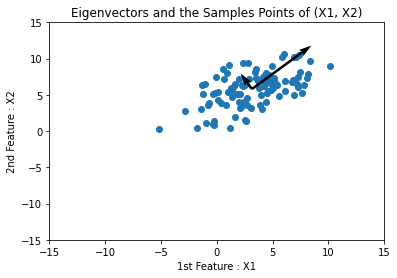

In [13]:
plt.scatter(X1, X2)
plt.xlim([-15, 15])
plt.ylim([-15, 15])

eig_vec1 = eigenvectors[:,0]
eig_vec2 = eigenvectors[:,1]
centered = sample_mean

plt.quiver(*centered, *eig_vec1, scale=eigenvalues[1], scale_units = 'height')
plt.quiver(*centered, *eig_vec2, scale=eigenvalues[0], scale_units = 'height')

plt.xlabel('1st Feature : X1')
plt.ylabel('2nd Feature : X2')
plt.title('Eigenvectors and the Samples Points of (X1, X2)')

U = [v1 v2] be a 2 × 2 matrix whose columns are the unit eigenvectors of the covariance matrix, where v1 is the eigenvector with the larger eigenvalue.

Text(0.5, 1.0, 'Centered Sample Points of (X1, X2)')

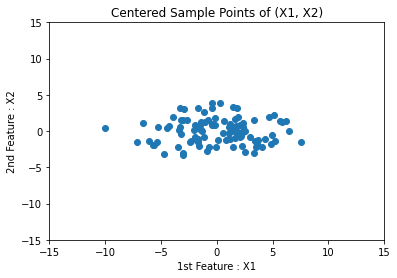

In [14]:
X1_center = [x - sample_mean[0] for x in X1]
X2_center = [x - sample_mean[1] for x in X2]
sampled_center = np.vstack((X1_center, X2_center))

U = eigenvectors.T

x_rotated = np.dot(U, sampled_center)

plt.scatter(x_rotated[0], x_rotated[1])
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.xlabel('1st Feature : X1')
plt.ylabel('2nd Feature : X2')
plt.title('Centered Sample Points of (X1, X2)')

# Question 8: Gaussian Discriminant Analysis

### Part 1: Mean and Covariance Matrix

In [15]:
for data_name in ["mnist", "spam"]:
    data = np.load(f"/Users/nataliekemper/Downloads/Berkeley/SPRING2023/CS189/Homework/hw3-2023/data/{data_name}-data-hw3.npz")
    print("\nloaded %s data!" % data_name)
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)


loaded mnist data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 32)
training_data (4172, 32)
training_labels (4172,)


In [16]:
mnist_data = np.load(f"../data/mnist-data-hw3.npz")

no_normtrainingList = mnist_data['training_data']
labelList = mnist_data['training_labels']

# Contrast-Normalizing the images
trainingList = no_normtrainingList / np.linalg.norm(no_normtrainingList)
trainingList.resize(60000, 784)

uniqueDigits = np.unique(labelList)

In [18]:
means = []
cov = []

for digit in range(10):
    digitClass = trainingList[labelList == digit]
    mean = np.mean(digitClass, axis = 0)
    covariance = np.cov(digitClass.T)
    means.append(mean)
    cov.append(covariance)

### Part 2: Visualizing the Covariance Matrix

Text(0.5, 1.0, 'Covariance')

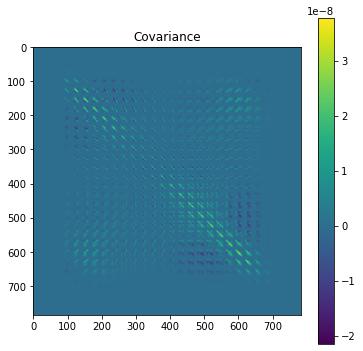

In [19]:
plt.figure(figsize = (6,6))
plt.imshow(cov[2])
plt.colorbar()
plt.title('Covariance')

I plotted the coviariance matrix for the digit class of 2. As we can see from the plot, the values on the diagonal are generally greater than those not on the diagonal. This tells us that pixels that are closer to one another have more correlation between them than pixel that are farther apart from one another. Pixel's closer are probably more dependent, and thus have more covariance that those they are independent from (where they would have a covariance of 0.)

### Part 3: LDA and QDA

In [20]:
# Partitioning data via method from HW 1

def shuffle_data(array1, array2, num):
    np.random.seed(20)
    merged_list = list(zip(array1, array2))
    
    shuffled = random.sample(merged_list, len(merged_list))
    
    unfiltered_training, unfiltered_val = shuffled[num:], shuffled[:num]
    
    X_training_data, y_training_labels = zip(*unfiltered_training)
    X_validation_data, y_validation_labels = zip(*unfiltered_val)
    
    return np.asarray(X_training_data), np.asarray(y_training_labels), np.asarray(X_validation_data), np.asarray(y_validation_labels)

In [21]:
# Partitioning MNIST data
mnist_data = np.load(f"../data/mnist-data-hw3.npz")

trainingList = mnist_data['training_data']
labelList = mnist_data['training_labels']

trainingList.resize(60000, 784)

X_mnistTrain_data, y_mnistTrain_labels, X_mnistVal_data, y_mnistVal_labels = shuffle_data(
    trainingList, labelList, 10000)

In [22]:
def lda_fit(X_train, Y_label, dataset = 'mnist'):
    # First we fit the data
    # 10 classes consisting of the digits 0-9
    num_examples = X_train.shape[0]
    num_features = X_train.shape[1]
    class_labels = np.unique(Y_label)
    pooled_cov = np.zeros((X_train.shape[1], X_train.shape[1]))
    
    priors = []
    means = []
    
    if (dataset == 'spam'):
        rng = range(2)
    else:
        rng = range(10)
        
    for c in rng:
        X_c = X_train[Y_label == c]
        prior = X_c.shape[0] / num_examples
        priors.insert(c, prior)
        mean_c = np.mean(X_c, axis = 0)
        means.append(mean_c)
        pooled_cov += np.dot((X_c - mean_c).T, X_c - mean_c)
        
    # Scaling pooled covariance matrix by the number of features (784)
    # Also, applying 7.2 trick (scaling Identity by small number and adding it to the cov matrix)
    pooled_cov = pooled_cov / num_examples
    identity = np.identity(pooled_cov.shape[0])
    eigenvalues, eigenvectors = np.linalg.eig(pooled_cov)
    alpha = abs(min(eigenvalues)) * identity
    pooled_cov += alpha
    
    return pooled_cov, means, priors
    
def lda_predict(X_val, cov, priors, means, dataset = 'mnist'):
    
    rvs = []
    if (dataset == 'spam'):
        rng = range(2)
    else:
        rng = range(10)
        
    for i in rng:
        rv = scipy.stats.multivariate_normal(means[i], cov, allow_singular = True)
        rvs.append(rv)
    
    posteriors = np.array([rv.logpdf(X_val) for rv in rvs])
    posteriors = posteriors.T + np.log(priors)
    
    val_pred = np.argmax(posteriors, axis = 1)
    
    return val_pred


In [23]:
def qda_fit(X_train, Y_label, dataset = 'mnist'):
    # First we fit the data
    # 10 classes consisting of the digits 0-9
    num_examples = X_train.shape[0]
    num_features = X_train.shape[1]
    class_labels = np.unique(Y_label)
    pooled_cov = np.zeros((X_train.shape[1], X_train.shape[1]))
    
    priors = []
    rvs = []
    
    if (dataset == 'spam'):
        rng = range(2)
    else:
        rng = range(10)
    
    for c in rng:
        X_c = X_train[Y_label == c]
        prior = X_c.shape[0] / num_examples
        priors.insert(c, prior)
        mean = np.mean(X_c, axis = 0)
        cov = np.cov(X_c.T)
        rv = scipy.stats.multivariate_normal(mean, cov, allow_singular = True)
        rvs.append(rv)
        
    return rvs, priors

def qda_predict(X_val, rvs, priors):
    
    posteriors = np.array([rv.logpdf(X_val) for rv in rvs])
    posteriors = posteriors.T + np.log(priors)
    
    val_pred = np.argmax(posteriors, axis = 1)
    
    return val_pred


#### Part a:

In [24]:
sets = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
train_acc = []
val_acc = []
error_rate = []

for num in sets:
    cov, means, priors = lda_fit(X_mnistTrain_data[:num, :], y_mnistTrain_labels[:num])
    
    val_pred = lda_predict(X_mnistVal_data, cov, priors, means)
    
    err = 1 - len(val_pred[y_mnistVal_labels == val_pred]) / len(y_mnistVal_labels)
    
    v_acc = accuracy_score(y_mnistVal_labels, val_pred)
    
    val_acc.append(v_acc)
    error_rate.append(err)
    print("Training Size: " + str(num) + ", Error: " + str(err))

Training Size: 100, Error: 0.4013
Training Size: 200, Error: 0.3891
Training Size: 500, Error: 0.6935
Training Size: 1000, Error: 0.3409
Training Size: 2000, Error: 0.22550000000000003
Training Size: 5000, Error: 0.1652
Training Size: 10000, Error: 0.14939999999999998
Training Size: 30000, Error: 0.1391
Training Size: 50000, Error: 0.13749999999999996


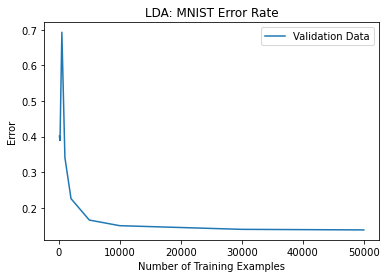

In [25]:
plt.figure(figsize = (6,4))
plt.plot(sets, error_rate, label='Validation Data')
plt.title('LDA: MNIST Error Rate')
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.legend()
plt.show()

#### Part b:

In [26]:
val_acc_qda = []
error_rate_qda = []

for num in sets:
    rvs, priors = qda_fit(X_mnistTrain_data[:num, :], y_mnistTrain_labels[:num])
    
    val_pred = qda_predict(X_mnistVal_data, rvs, priors)
    
    err = 1 - len(val_pred[y_mnistVal_labels == val_pred]) / len(y_mnistVal_labels)
    
    v_acc = accuracy_score(y_mnistVal_labels, val_pred)
    
    val_acc_qda.append(v_acc)
    error_rate_qda.append(err)
    print("Training Size: " + str(num) + ", Error: " + str(err))

Training Size: 100, Error: 0.8905
Training Size: 200, Error: 0.8503000000000001
Training Size: 500, Error: 0.3891
Training Size: 1000, Error: 0.19620000000000004
Training Size: 2000, Error: 0.28469999999999995
Training Size: 5000, Error: 0.3245
Training Size: 10000, Error: 0.18989999999999996
Training Size: 30000, Error: 0.14529999999999998
Training Size: 50000, Error: 0.1381


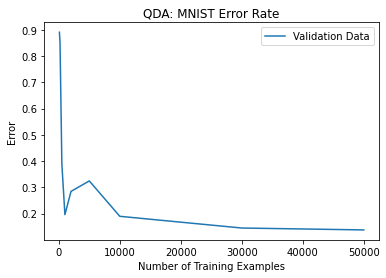

0.1381


In [27]:
plt.figure(figsize = (6,4))
plt.plot(sets, error_rate_qda, label='Validation Data')
plt.title('QDA: MNIST Error Rate')
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.legend()
plt.show()
print(error_rate_qda[8])

#### Part c: Which is better?

The two models are fairly comparable. For smaller samples, LDA is slightly better the QDA, but as the training samples increase, we see that QDA became slightly better. Perhaps this is due to the variability of covariance matrices between distinct digits, compared to LDA's single covariance matrix.

#### Part d: Validation Accuracies for Each Digit

In [28]:
val_acc_lda = [[],[],[],[],[],[],[],[],[],[]]
for digit in range(10):  
    for num in sets:
        cov, means, priors = lda_fit(X_mnistTrain_data[:num, :], y_mnistTrain_labels[:num])
        val_train_digit = X_mnistVal_data[y_mnistVal_labels == digit]
        val_label_digit = y_mnistVal_labels[y_mnistVal_labels == digit]
    
        val_pred = lda_predict(val_train_digit, cov, priors, means)
    
        err = 1 - len(val_pred[val_label_digit == val_pred]) / len(val_label_digit)
    
        val_acc_lda[digit].append(err)

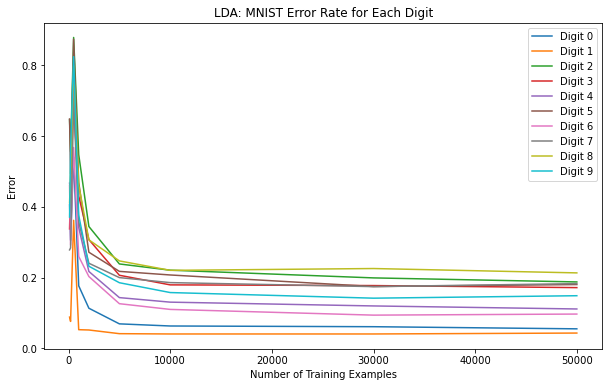

In [29]:
plt.figure(figsize = (10,6))
digit = 0
for i in val_acc_lda:
    plt.plot(sets, i, label = 'Digit ' + str(digit))
    digit += 1
plt.title('LDA: MNIST Error Rate for Each Digit')
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.legend()
plt.show()

In [30]:
val_acc_qda = [[],[],[],[],[],[],[],[],[],[]] 
for digit in range(10):
    for num in sets:
        rvs, priors = qda_fit(X_mnistTrain_data[:num, :], y_mnistTrain_labels[:num])
        
        val_train_digit = X_mnistVal_data[y_mnistVal_labels == digit]
        val_label_digit = y_mnistVal_labels[y_mnistVal_labels == digit]
        val_pred = qda_predict(val_train_digit, rvs, priors)
    
        err = 1 - len(val_pred[val_label_digit == val_pred]) / len(val_label_digit)
        
        val_acc_qda[digit].append(err)

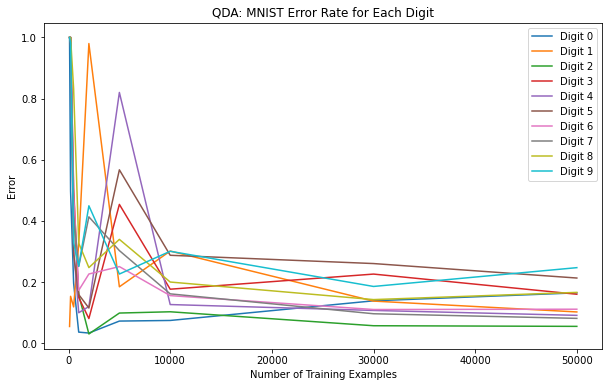

In [31]:
plt.figure(figsize = (10,6))
digit = 0
for i in val_acc_qda:
    plt.plot(sets, i, label = 'Digit ' + str(digit))
    digit += 1
plt.title('QDA: MNIST Error Rate for Each Digit')
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.legend()
plt.show()

### Part 4: MNIST Kaggle

In [32]:
mnistTrain = mnist_data['training_data']
mnistTest = mnist_data['test_data']

mnistTraining = mnistTrain.reshape(60000, 784)
mnistTrainLabels = mnist_data['training_labels']

mnistTesting = mnistTest.reshape(10000, 784)

In [33]:
rvs, priors = qda_fit(mnistTraining, mnistTrainLabels)
    
val_pred = qda_predict(mnistTesting, rvs, priors)

results_to_csv(val_pred)

In [34]:
print("Kaggle Username: nadaleek")
print("Kaggle MNIST Score: 0.88766")

Kaggle Username: nadaleek
Kaggle MNIST Score: 0.88766


### Part 5: Spam Kaggle

In [35]:
spam_data = np.load(f"../data/spam-data-hw3.npz")

spamTraining = spam_data['training_data']
spamLabel = spam_data['training_labels']

X_spamTrain_data, y_spamTrain_labels, X_spamVal_data, y_spamVal_labels = shuffle_data(
    spamTraining, spamLabel, 1000)

In [36]:
# Trying LDA for Spam

spamSets = [100, 200, 500, 1000, 2000, 3172]
train_acc = []
val_acc = []
error_rate = []

for num in spamSets:
    cov, means, priors = lda_fit(X_spamTrain_data[:num, :], y_spamTrain_labels[:num], dataset = 'spam')
    
    val_pred = lda_predict(X_spamVal_data, cov, priors, means, dataset = 'spam')
    
    err = 1 - len(val_pred[y_spamVal_labels == val_pred]) / len(y_spamVal_labels)
    
    v_acc = accuracy_score(y_spamVal_labels, val_pred)
    
    val_acc.append(v_acc)
    error_rate.append(err)
    print("Training Size: " + str(num) + ", Error: " + str(err) + ", Accuracy: " + str(v_acc))

Training Size: 100, Error: 0.263, Accuracy: 0.737
Training Size: 200, Error: 0.23299999999999998, Accuracy: 0.767
Training Size: 500, Error: 0.21199999999999997, Accuracy: 0.788
Training Size: 1000, Error: 0.21799999999999997, Accuracy: 0.782
Training Size: 2000, Error: 0.21399999999999997, Accuracy: 0.786
Training Size: 3172, Error: 0.21599999999999997, Accuracy: 0.784


In [37]:
# Trying QDA for Spam

spamSets = [100, 200, 500, 1000, 2000, 3172]
train_acc = []
val_acc = []
error_rate = []

for num in spamSets:
    rvs, priors = qda_fit(X_spamTrain_data[:num, :], y_spamTrain_labels[:num], dataset = 'spam')
    
    val_pred = qda_predict(X_spamVal_data, rvs, priors)
    
    err = 1 - len(val_pred[y_spamVal_labels == val_pred]) / len(y_spamVal_labels)
    
    v_acc = accuracy_score(y_spamVal_labels, val_pred)
    
    val_acc.append(v_acc)
    error_rate.append(err)
    print("Training Size: " + str(num) + ", Error: " + str(err) + ", Accuracy: " + str(v_acc))

Training Size: 100, Error: 0.42400000000000004, Accuracy: 0.576
Training Size: 200, Error: 0.523, Accuracy: 0.477
Training Size: 500, Error: 0.5389999999999999, Accuracy: 0.461
Training Size: 1000, Error: 0.29700000000000004, Accuracy: 0.703
Training Size: 2000, Error: 0.267, Accuracy: 0.733
Training Size: 3172, Error: 0.249, Accuracy: 0.751


Using LDA on Spam consistently produced better results. Therefore, we will train using LDA.

In [38]:
spamTraining = spam_data['training_data']
spamTrainLabels = spam_data['training_labels']

spamTesting = spam_data['test_data']

In [39]:
cov, means, priors = lda_fit(spamTraining, spamTrainLabels, dataset = 'spam')

val_pred = lda_predict(spamTesting, cov, priors, means, dataset = 'spam')

results_to_csv(val_pred)

In [40]:
print("Kaggle Username: nadaleek")
print("Kaggle Spam Score: 0.78400")

Kaggle Username: nadaleek
Kaggle Spam Score: 0.78400
